# 文字輸入

In [1]:
file = open('pdf_contentAUO.txt',encoding="utf-8")

text = file.read()

In [7]:
text[:1000]

'Copyright© June 2020 AU Optronics Corp. All rights reserved. Information may change without notice.\nCORPORATE\nSOCIAL\nRESPONSIBILITY\nREPORT\n2019\nAUO 2019 Corporate Social Responsibility Report\n3.2 Risk Management \n55\n3.2.1Business Risk Identification and Operations Management \n55\n3.2.2 Information Security Management \n63\n3.2.3 Taxation Risk \n65\n3.3 Business Integrity \n66\n3.4 Subsidiary Overview \n70\n3.5 Customer Relations  \n73\n3.6 Supply Chain Management \n74\n3.6.1 Improving Supply Chain Resilience \n74\n3.6.2 Responsible Supply Chain \n76\n3.6.3 Supplier Sustainability Engagement \n79\n04 Environmental Sustainability\n4.1 Climate Change \n86\n4.1.1 Governance Organization \n86\n4.1.2 Strategic Blueprint \n87\n4.1.3 Risk Adaptation \n87\n4.1.4 Greenhouse Gas Inventory \n92\n4.1.5 Carbon Reduction Target \n96\n4.1.6 Greenhouse Gas Reduction Actions \n97\n4.1.7 Operation of other Carbon Management Measures \n100\n4.2 Water Resource Management \n104\n4.3 Green Product

# 文字前處理

分句分詞

In [3]:
import nltk

In [4]:
sentences = nltk.sent_tokenize(text)

In [5]:
tokens = [nltk.word_tokenize(sent) for sent in sentences]

In [6]:
tokens[6]

['The',
 'CSR',
 'report',
 'is',
 'now',
 'prepared',
 'in',
 'accordance',
 'with',
 'the',
 'Comprehensive',
 'options',
 'of',
 'the',
 'GRI',
 'Standards',
 '.']

轉小寫

In [8]:
for sent in tokens:
    for i in range(len(sent)):
        sent[i] = sent[i].lower()

標註詞性

In [9]:
#1
pos1 = [nltk.pos_tag(sent) for sent in tokens]

In [9]:
pos1[1]

[('information', 'NN'),
 ('may', 'MD'),
 ('change', 'VB'),
 ('without', 'IN'),
 ('notice', 'NN'),
 ('.', '.')]

還原詞態

In [10]:
from nltk.corpus import wordnet

In [11]:
from nltk.stem import WordNetLemmatizer 

In [12]:
pos1[2]

[('corporate', 'JJ'),
 ('social', 'JJ'),
 ('responsibility', 'NN'),
 ('report', 'NN'),
 ('2019', 'CD'),
 ('auo', 'JJ'),
 ('2019', 'CD'),
 ('corporate', 'JJ'),
 ('social', 'JJ'),
 ('responsibility', 'NN'),
 ('report', 'NN'),
 ('3.2', 'CD'),
 ('risk', 'NN'),
 ('management', 'NN'),
 ('55', 'CD'),
 ('3.2.1business', 'CD'),
 ('risk', 'NN'),
 ('identification', 'NN'),
 ('and', 'CC'),
 ('operations', 'NNS'),
 ('management', 'NN'),
 ('55', 'CD'),
 ('3.2.2', 'CD'),
 ('information', 'NN'),
 ('security', 'NN'),
 ('management', 'NN'),
 ('63', 'CD'),
 ('3.2.3', 'CD'),
 ('taxation', 'NN'),
 ('risk', 'NN'),
 ('65', 'CD'),
 ('3.3', 'CD'),
 ('business', 'NN'),
 ('integrity', 'NN'),
 ('66', 'CD'),
 ('3.4', 'CD'),
 ('subsidiary', 'NN'),
 ('overview', 'NN'),
 ('70', 'CD'),
 ('3.5', 'CD'),
 ('customer', 'NN'),
 ('relations', 'NNS'),
 ('73', 'CD'),
 ('3.6', 'CD'),
 ('supply', 'NN'),
 ('chain', 'NN'),
 ('management', 'NN'),
 ('74', 'CD'),
 ('3.6.1', 'CD'),
 ('improving', 'VBG'),
 ('supply', 'NN'),
 ('chain',

In [12]:
#標註詞性函數
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [13]:
#1
wnl = WordNetLemmatizer()
lemmas_sent = []

for sent in pos1:
    cell = []
    for word,tag in sent:
        wordnet_pos = get_wordnet_pos(tag) or wordnet.NOUN
        cell.append(wnl.lemmatize(word, pos=wordnet_pos))
    lemmas_sent.append(cell)

In [14]:
lemmas_sent[3]

['the',
 'corporate',
 'social',
 'responsibility',
 '(',
 'csr',
 ')',
 'report',
 'have',
 'be',
 'publish',
 'on',
 'an',
 'annual',
 'basis',
 'since',
 '2006',
 '.']

重新連接專有名詞，並先將符號改名

In [15]:
import re

In [16]:
#1
for sent in lemmas_sent: #test_tokens
    for i in range(len(sent)):
        sent[i] = re.sub('[''-!@#$+——?【•】|“@”~●\d#……￥``&>；*,，%〔’･〕:；�_()／/╱.’]', '', sent[i])
        #把所有符號改成沒東西

In [17]:
#1
lemmas_sent[30]

['progress',
 'have',
 'be',
 'make',
 'over',
 'the',
 'last',
 'year',
 'in',
 'new',
 'business',
 'such',
 'a',
 'smart',
 'retail',
 '',
 'big',
 'health',
 '',
 'circular',
 'economy',
 '',
 'and',
 'intelligent',
 'industrial',
 'service',
 '']

In [18]:
from nltk.tokenize import MWETokenizer

In [19]:
pn_list = [word.strip('\n').split(',')  for word in open('proper noun.csv') ] #proper noun.csv為輸入專有名詞的地方
for cell in pn_list:
    while cell[-1] == '':
        del cell[-1] #讀取並處理

In [20]:
pn_list[-5]

['restriction', 'of', 'hazardous', 'substances']

In [21]:
tokenizer = MWETokenizer(pn_list)
#tokenizer.add_mwe(('in', 'spite', 'of'))

In [22]:
pn_tokens =[]
for sent in lemmas_sent:
    pn_tokens.append(tokenizer.tokenize(sent))

In [23]:
pn_tokens[1959]

['',
 'inclusive',
 'growth',
 'greenark',
 'at',
 'longtan',
 'site',
 'to',
 'communicate',
 'the',
 'ideal',
 'of',
 'sustainable',
 'water_resource',
 'use',
 'and',
 'expand',
 'it',
 'influence',
 '',
 'the',
 'auo',
 'greenark',
 'water_resource',
 'gallery',
 'be',
 'certify',
 'a',
 'an',
 'environmental',
 'education',
 'facility',
 'in',
 'july',
 '',
 'and',
 'become',
 'the',
 'th',
 'environmental',
 'education',
 'facility',
 'in',
 'taoyuan',
 'city',
 '']

去除停止詞、符號

In [24]:
#1
from nltk.corpus import stopwords
stopwords.words('english')
used_tokens = pn_tokens

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
clean_tokens =[]
for sent in used_tokens:
    if len(sent) > 1:
        clean_tokens.append([word for word in sent if (word not in stopwords.words('english') and word !='' and word != '-')])


In [27]:
clean_tokens[45]

['even',
 'covid',
 'pandemic',
 'come',
 'nowhere',
 'send',
 'world',
 'reeling',
 'auo',
 'manage',
 'set',
 'global',
 'bcm',
 'command',
 'center',
 "''",
 'make',
 'decision',
 'base',
 'principle']

In [28]:
#根據觀察結果額外處理:目前為而外去除不知道為啥沒被去掉的符號，以及去掉單一字母的字
test_tokens = []
#company = ['delta','asml','infineon','Innolux','omron','osram','ricoh','samsung','schneider','ase','cisco','tsmc','acer','konica','nanya','prysmian','stm']
for sent in clean_tokens:
    test_tokens.append([word for word in sent if (len(word) > 2 and word !="'" and word != "''" and word !="；" and
                        word !="our" and word !="they")])




In [29]:
test_tokens[1101]

['therefore',
 'develop',
 'lowenergyconsumption',
 'display',
 'product',
 'jointly',
 'reduce',
 'speed',
 'carbon',
 'emission',
 'hand',
 'continue',
 'develop',
 'operational',
 'resilience',
 'product',
 'enhance',
 'operation',
 'city',
 'enterpris',
 'cope',
 'extreme_weather']

# 向量化模型

(若有需要)輸入模型

In [55]:
model = Word2Vec.load('候選模型\word2vec_m5.model')

創建新模型

In [56]:
from gensim.models.word2vec import Word2Vec
import pandas as pd

In [131]:
model = Word2Vec(read_tokens,sg = 1,window=2, size=100,min_count=30,iter=15,negative=5)
#目前狀況: window影響不大 size越小越好 (100不錯)

In [57]:
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [71]:
most_similar(model, ['salary','energy_comsumption','','environment','data_privacy','risk_assessment','shareholder'])

energy_comsumption not found in Word2Vec model!
 not found in Word2Vec model!


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,salary,cos,environment,cos,data_privacy,cos,risk_assessment,cos,shareholder,cos
0,wage,0.648633,envi,0.510717,privacy,0.609610,checklist,0.659666,stockholder,0.715739
1,median,0.614072,environ,0.486581,cybersecurity,0.602136,mapping,0.640394,general_meeting,0.620756
2,base_salary,0.599902,decent,0.453787,data_protection,0.600756,riskbased,0.627001,shareowner,0.612159
3,performancebased,0.590242,vibrant,0.452582,antibribery,0.591527,saq,0.624901,dividend,0.563256
4,hourly,0.579100,planet,0.442781,information_protection,0.587214,selfassessments,0.604897,holder,0.526390
5,compensation,0.570247,ruie,0.441698,confidentiality,0.564750,selfassessment,0.599908,investor,0.522835
6,bonus,0.564110,resource_management,0.439719,information_security,0.552072,questionnaire,0.565656,agm,0.508641
7,pay,0.561272,work_environment,0.432026,openness,0.544832,nonconformance,0.561625,vote,0.505858
8,performancelinked,0.556549,coexistence,0.432007,compliance,0.540953,assessment,0.551722,bom,0.502133
9,remuneration,0.512851,environmental_sustainability_approach,0.427697,anti,0.525870,mitigation,0.530841,withhold,0.490653


In [8]:
#測試精確度的東西，先暫時不要用
from gensim.test.utils import datapath

similarities = model.wv.evaluate_word_pairs(datapath('simlex999.txt'))
print(similarities)

((0.16966211304087636, 0.0007322172465412598), SpearmanrResult(correlation=0.161727627711209, pvalue=0.0012948595485995776), 60.66066066066066)


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
similarities2 = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print(similarities2)

(0.1411530815109344, [{'section': 'capital-common-countries', 'correct': [('BEIJING', 'CHINA', 'TOKYO', 'JAPAN'), ('BERLIN', 'GERMANY', 'PARIS', 'FRANCE'), ('MOSCOW', 'RUSSIA', 'MADRID', 'SPAIN'), ('PARIS', 'FRANCE', 'BERLIN', 'GERMANY'), ('TOKYO', 'JAPAN', 'BEIJING', 'CHINA'), ('TOKYO', 'JAPAN', 'MOSCOW', 'RUSSIA')], 'incorrect': [('BEIJING', 'CHINA', 'BERLIN', 'GERMANY'), ('BEIJING', 'CHINA', 'LONDON', 'ENGLAND'), ('BEIJING', 'CHINA', 'MADRID', 'SPAIN'), ('BEIJING', 'CHINA', 'MOSCOW', 'RUSSIA'), ('BEIJING', 'CHINA', 'PARIS', 'FRANCE'), ('BERLIN', 'GERMANY', 'LONDON', 'ENGLAND'), ('BERLIN', 'GERMANY', 'MADRID', 'SPAIN'), ('BERLIN', 'GERMANY', 'MOSCOW', 'RUSSIA'), ('BERLIN', 'GERMANY', 'TOKYO', 'JAPAN'), ('BERLIN', 'GERMANY', 'BEIJING', 'CHINA'), ('LONDON', 'ENGLAND', 'MADRID', 'SPAIN'), ('LONDON', 'ENGLAND', 'MOSCOW', 'RUSSIA'), ('LONDON', 'ENGLAND', 'PARIS', 'FRANCE'), ('LONDON', 'ENGLAND', 'TOKYO', 'JAPAN'), ('LONDON', 'ENGLAND', 'BEIJING', 'CHINA'), ('LONDON', 'ENGLAND', 'BERLIN', 

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


儲存模型

In [118]:
model.save('word2vec_m6.model')

In [72]:
with open('keywords.txt', 'r',encoding="UTF-8") as k:
    keywords = k.read().split("\n")

把所有關鍵字找出相關詞並儲存成CSV

In [73]:
keywords

['supply_chain',
 'human_right',
 'corporate_social_responsibility',
 'risk_management',
 'corporate_governance',
 'climate_change',
 'csr_report',
 'sustainable_development',
 'management_approach',
 'greenhouse_gas',
 'health_and_safety',
 'environmental_protection',
 'supervisory_board',
 'management_system',
 'renewable_energy',
 'environmental_impact',
 'circular_economy',
 'energy_consumption',
 'internal_control',
 'general_meeting',
 'energy_efficiency',
 'material_topic',
 'material_issue',
 'water_consumption',
 'corporate_governance_report',
 'corporate_sustainability',
 'fair_value',
 'energy_conservation',
 'customer_satisfaction',
 'risk_assessment',
 'gri_standard',
 'board_of_management',
 'occupational_health',
 'internal_audit',
 'energy_management',
 'social_participation',
 'energy_saving',
 'information_security',
 'sustainable_governance',
 'safety_and_health',
 'water_resource',
 'sustainability_report',
 'financial_performance',
 'shareholder_information',
 'str

In [74]:
similar_words = most_similar(model, keywords)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


progress_report not found in Word2Vec model!
 not found in Word2Vec model!


In [75]:
similar_words.to_csv('similar_words_5.csv',encoding="UTF-8-sig")
k.close()

寫入csv(TXT的話改黨名就好)

In [ ]:
'''def save(list,txtname):
    with open('txtname.txt', 'w',encoding="UTF-8-sig", newline='') as f:
        for line in list:
            f.writelines(line +',')
    f.close()'''

In [30]:
#1
with open('processed_contentAUO.csv', 'w',encoding="UTF-8-sig") as f:
    for line in test_tokens[:]:
        for word in line:
            f.writelines(word +',')
        f.writelines("\n")
f.close()

讀取CSV

In [50]:
import csv
read_tokens = []
# 開啟 CSV 檔案
with open('processed_contentVec.csv','r',newline='',encoding='UTF-8-sig') as csvf:
    rows = csv.reader(csvf)
    for row in rows:
        read_tokens.append(row)
csvf.close()

In [52]:
for token in read_tokens:
    if len(token) == 0:
        continue
    elif token[-1] == '':
        del(token[-1]) #去除一個尾巴的空格
read_tokens[10]

['case', 'number', 'round', 'reader', 'convenience']

In [54]:
read_tokens[1550]

['attach',
 'great',
 'importance',
 'composition',
 'independence',
 'diversity',
 'broad',
 'possible',
 'sense',
 'strives',
 'meet',
 'associate',
 'guideline',
 'requirement']

計算詞頻

In [ ]:
'''def freq_cal(list):
    import matplotlib.pyplot as plt
    freq = nltk.FreqDist(list)
    for key,val in freq.items():
        print (str(key) + ':' + str(val))
        
    sort = sorted(freq.items(), key=lambda x: x[1],reverse = True)
    dic = dict(sort[0:20])
    plt.bar(range(len(dic)), list(dic.values()))
    plt.xticks(range(len(dic)), list(dic.keys()))
    plt.show()'''

In [31]:
imerge_token=[]
for sent in test_tokens:
    for token in sent:
        imerge_token.append(token)

In [32]:
len(imerge_token)

51792

In [33]:
freq = nltk.FreqDist(imerge_token)
for key,val in freq.items():
    print (str(key) + ':' + str(val))


copyright©:3
june:9
optronics:14
corp:6
right:38
reserve:7
information:116
may:29
change:52
without:21
notice:8
corporate_social_responsibility:116
report:241
auo:901
risk_management:31
business:249
risk:224
identification:24
operation:188
management:505
information_security_management:9
taxation:10
integrity:50
subsidiary:33
overview:21
customer:145
relation:29
supply_chain_management:23
improve:93
supply_chain:73
resilience:22
responsible_supply_chain:18
supplier_sustainability:4
engagement:53
environmental_sustainability:72
climate_change:65
governance:47
organization:101
strategic:17
blueprint:14
adaptation:24
greenhouse_gas:47
inventory:51
carbon_reduction:54
target:162
reduction:93
action:61
carbon:175
measure:52
water_resource:52
green:122
production:164
energy:169
efficient:5
wastewater:20
air_pollution:8
reuse:39
waste:82
product:268
innovation:53
design:135
hazardous:30
substance:42
foreword:101
letter:10
chairman:28
chief:16
sustainability:119
officer:18
award:125
recognitio

nonconflict:1
collate:1
delisted:1
diligence:2
trail:3
parent:1
metallic:1
trigger:1
tners:1
responsible_business_alliance:6
observer:2
incidence:1
scott:1
chang:1
tuv:1
rheinland:1
planet:5
electricitysaving:3
collective:4
influx:1
temporary:5
modification:2
cdp:9
outperformed:1
enterprises:1
particular:2
water_conservation:16
refers:5
much:3
consume:5
fiveyear:2
additive:1
product_life_cycle:5
intervention:3
celebration:2
arbor:3
earth:7
educe:1
ecology:3
corporate_responsibility:2
achievements:1
substantially:1
waste_generation:6
adjoin:2
transmit:6
tance:1
volatile:5
compound:10
vocs:7
▌environmental:2
sewage:5
reclaim:15
wastewater_treatment:2
photoelectric:2
load:12
kgm:3
hydroﬂuoric:1
acid:6
applicable:16
▌materials:1
photoresist:2
array:2
stripper:4
processthinner:1
aluminum:2
etchant:2
purchased:1
megaliters:7
ground:2
rainwater:1
selfgenerated:2
tie:2
ghgrelated:1
ods:2
emissions:1
sulfur:3
oxides:1
tonnes:2
nitrogen:4
oxide:4
fluorides:1
hcl:1
voc:2
energy_use:1
liquefy:1
pe

wiring:2
selfdeveloped:2
moderate:1
renewable_energy_certificate:1
activist:1
certiﬁcates:2
used:1
honorably:1
appraisal:6
widely:1
saltspray:1
afﬁrmed:1
peak:1
combination:2
charge:3
practitioner:1
fresh:1
exclusive:3
extranet:1
multifaceted:1
upholds:1
liang:1
chiyuan:1
nationwide:1
personstimes:2
ﬁrstlevel:1
ict:1
nonﬁnancial:1
responds:1
nation_sustainable_development:1
exemplary:1
eugene:1
chien:1
afﬁrm:1
joining:1
exert:2
furthermore:1
invited:1
localization:1
flooding:1
alteration:1
uncertainty:1
alleviate:1
facing:1
pragmatically:1
rtp:3
triple:1
polarizers:2
foil:1
signiﬁcant:1
nitto:3
denko:1
batch:1
patented:1
ﬁlm:2
reduce_waste_generation:1
chrystal:1
pamel:1
standalone:1
nonscheduled:1
infotainment:1
reformation:1
proﬁtmaking:1
comqi:1
erp:1
speciﬁcally:1
possess:1
fashionable:1
plane:1
extremely:1
specialshaped:1
cutting:1
ultimate:1
technics:1
higherquality:1
partition:5
speciﬁcation:1
nanooptical:2
electron:1
beam:1
lithography:1
anufacturing:1
semireﬂection:1
reﬂection

In [34]:
sort = sorted(freq.items(), key=lambda x: x[1],reverse = True)

In [35]:
print(sort)

[('auo', 901), ('management', 505), ('employee', 451), ('chapter', 449), ('also', 295), ('company', 282), ('product', 268), ('business', 249), ('report', 241), ('technology', 237), ('use', 225), ('risk', 224), ('system', 218), ('year', 206), ('development', 203), ('supplier', 199), ('taiwan', 191), ('water', 190), ('operation', 188), ('material', 183), ('issue', 180), ('provide', 179), ('high', 177), ('carbon', 175), ('key', 174), ('energy', 169), ('production', 164), ('process', 163), ('target', 162), ('display', 158), ('performance', 156), ('total', 156), ('education', 152), ('site', 152), ('reduce', 151), ('csr', 150), ('customer', 145), ('include', 139), ('design', 135), ('appendix', 132), ('service', 132), ('panel', 131), ('work', 130), ('response', 130), ('time', 129), ('award', 125), ('factory', 125), ('annual', 124), ('director', 123), ('gri', 123), ('green', 122), ('training', 122), ('emission', 122), ('new', 121), ('sustainability', 119), ('information', 116), ('corporate_soc

In [36]:
sort[0:20]

[('company', 7134),
 ('employee', 7109),
 ('group', 5941),
 ('year', 5332),
 ('business', 5311),
 ('report', 5309),
 ('product', 5272),
 ('management', 4543),
 ('use', 4448),
 ('supplier', 4344),
 ('risk', 4110),
 ('include', 4010),
 ('director', 3784),
 ('share', 3753),
 ('also', 3383),
 ('system', 3306),
 ('total', 3257),
 ('customer', 3223),
 ('provide', 3192),
 ('board', 3054)]

In [50]:
dic = dict(sort[0:10])

In [47]:
import matplotlib.pyplot as plt

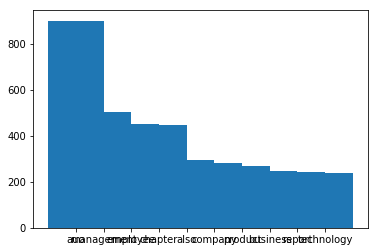

In [51]:
plt.bar(range(len(dic)), list(dic.values()),width=2.0)
plt.xticks(range(len(dic)), list(dic.keys()))
plt.show()

In [36]:
with open('sort_freqAUO.csv', 'w',encoding="UTF-8", newline='') as f:
    for line in sort:
        f.writelines(line[0]+',' + str(line[1]) +'\n')
f.close()

In [14]:
    for line in sort[0:5]:
        print(line)

('auo', 901)
('management', 505)
('employee', 451)
('chapter', 449)
('also', 295)
